# Exercise 4: Data tables and manipulation

This homework assignment is designed to get you comfortable loading and working with data tables.

You will need to download the **LexicalData_toclean.csv** file from the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not.

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data. 

In [2]:
lexical <- read.csv('LexicalData_toclean.csv')
head(lexical)
nrow(lexical) # looking at 62610 rows in this dataset

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,"1,094",refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


The **LexicalData_toclean.csv** file contains the variables `Sub_ID` (Subject ID), `Trial` (the trial number), `D_RT` (reaction time) and `D_Word` (the word they were responding to).

---
## 2. Data Cleansing (4 points)

There are three things we want to do to make this data more useable:
* Get rid of the commas in the reaction time values, and make this variable numeric (hint: check out the functions `gsub` and `as.numeric`).
* Get rid of rows where the reaction times are missing (hint: you can use the `filter` function from `tidyverse`, but you'll need to load the library).
* Make sure all of the reaction times are positive. 

Write code that will copy the data to a new variable and make the above changes. 

In [6]:
# remove RT commas and make numeric
lexical$D_RT <- as.numeric(gsub(",","",lexical$D_RT))
lexical

# remove rows with no RT
library(tidyverse)
lexical %>% filter(D_RT != '') -> lexical_clean
nrow(lexical_clean) # now 62607 rows, 3 removed

# make sure all RTs are positive
sum(lexical_clean$col < 0) # the number of negatives is 0

Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>
157,1,1,710,browse,false,-0.437
67,1,1,1094,refrigerant,false,0.825
120,1,1,587,gaining,false,-0.645
21,1,1,984,cheerless,false,0.025
236,1,1,577,pattered,false,-0.763
236,2,1,715,conjures,false,-0.364
236,5,1,826,censorship,false,-0.043
236,6,1,928,beckon,false,0.251
236,8,1,1047,superscribe,false,0.595


[1] 62607

[1] 0

For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the *type* of anomaly it's addressing. 

> *Write your response here.*
> * First action: Syntactical; domain format error
> * Second action: Coverage; missing value(s)
> * Third action: Semantic; integrity constraint violation

---
## 3. Data Manipulation with Tidyverse (4 points)

Now let's use `tidyverse` functions to play around with this data a bit. Use the piping operator (`%>%`) in both of these code cells. 

First, let's get some useful summary **statistics** using `summarise`. Output a table that tells us how many observations there are in the data set, as well as the mean and standard deviation of the reaction times.

In [ ]:
smry <- lexical_clean  %>% #creating new smry object
  summarise(n_subjects = length(Sub_ID), # how many observations there are
            RT_mean = mean(D_RT), # mean RTs
            RT_sd = sd(D_RT) # sd RTs
  )
smry

Now, we'll use `mutate` to re-number the trials, starting from 0 instead of 1. Make a new variable that is equal to the `Trial` variable minus one. 

In [9]:
lexical_clean <- lexical_clean  %>%
  mutate(Trial_0 = Trial - 1)
head(lexical_clean) #double check this worked

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Trial_0
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,157,1,1,710,browse,false,-0.437,0
2,67,1,1,1094,refrigerant,false,0.825,0
3,120,1,1,587,gaining,false,-0.645,0
4,21,1,1,984,cheerless,false,0.025,0
5,236,1,1,577,pattered,false,-0.763,0
6,236,2,1,715,conjures,false,-0.364,1


---
## 4. Plotting Data (1 point)

Use the `plot()` function to visualize the data, in a way that helps you see if there's a relationship between `D_RT` and your new trial variable.

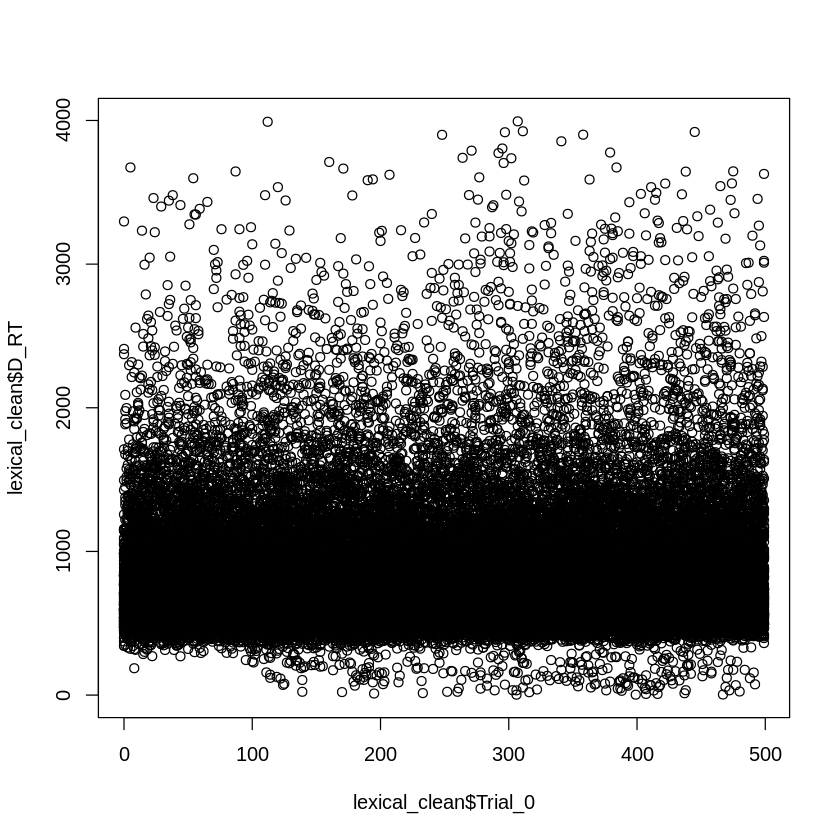

In [10]:
plot(lexical_clean$Trial_0, lexical_clean$D_RT)

That's all for this assignment! When you are finished, save the notebook as Exercise4.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas.

**DUE:** 5pm EST, Feb 13, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*